# Kosten und Leistungsrechnung

Ein Projekt, bei dem die manuell bearbeiteten Systeme im Modul Kosten- und Leistungsrechnung, das im Rahmen der Hochschulausbildung gezeigt wird, zu Lernzwecken in Python übertragen werden.

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:


def geometrische_abschreibung(abschreibungsumme, prozentsatz, ablaufzeit):
  myDict = {}
  abschreibung  = 0
  restbuchwert = abschreibungsumme
  for i in range(ablaufzeit):
    abschreibung = restbuchwert * (prozentsatz / 100)
    restbuchwert = restbuchwert - abschreibung
    myDict[i] = restbuchwert
  return myDict


def digitale_abschreibung(abschreibungsumme, ablaufzeit):
  myDict = {}
  d = (2 / (ablaufzeit * (ablaufzeit + 1)))
  a1 = (d * ablaufzeit)
  currenta = a1
  abschreibung = 0
  restbuchwert = abschreibungsumme
  for i in range(ablaufzeit):
    print(f"currenta={currenta}")
    abschreibung = abschreibungsumme * currenta
    restbuchwert = restbuchwert - abschreibung
    myDict[i] = restbuchwert
    currenta = currenta - d
  return myDict









{0: 140000.0, 1: 98000.0, 2: 68600.0, 3: 48020.0, 4: 33614.0, 5: 23529.800000000003, 6: 16470.86, 7: 11529.602, 8: 8070.7214, 9: 5649.50498, 10: 3954.653486, 11: 2768.2574402, 12: 1937.78020814, 13: 1356.446145698, 14: 949.5123019886, 15: 664.65861139202, 16: 465.261027974414, 17: 325.6827195820898, 18: 227.97790370746287, 19: 159.584532595224, 20: 111.7091728166568, 21: 78.19642097165976, 22: 54.73749468016183, 23: 38.31624627611328, 24: 26.821372393279297, 25: 18.77496067529551, 26: 13.142472472706856, 27: 9.1997307308948, 28: 6.43981151162636, 29: 4.507868058138452, 30: 3.155507640696916, 31: 2.208855348487841, 32: 1.5461987439414888, 33: 1.0823391207590423, 34: 0.7576373845313296, 35: 0.5303461691719307, 36: 0.3712423184203515, 37: 0.25986962289424603, 38: 0.18190873602597224, 39: 0.12733611521818056, 40: 0.08913528065272638, 41: 0.06239469645690847, 42: 0.04367628751983593, 43: 0.030573401263885153, 44: 0.021401380884719608, 45: 0.014980966619303725, 46: 0.010486676633512607, 47: 

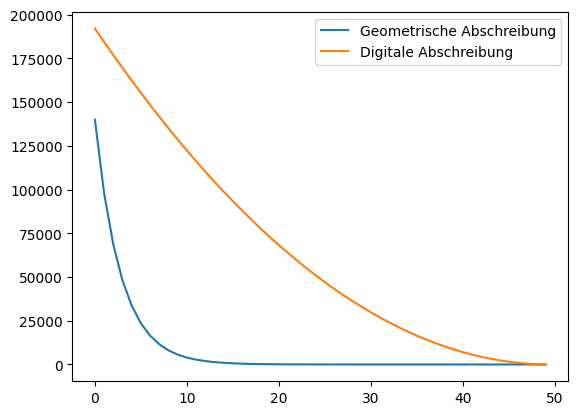

In [ ]:
dict = geometrische_abschreibung(200000,30,50)
print(dict)

dict2 = digitale_abschreibung(200000,50)
print(dict2)

dataFrame = pd.DataFrame(dict.items(), columns=['jahr', 'restbuchwert'])
print(dataFrame)

dataFrame2 = pd.DataFrame(dict2.items(), columns=['jahr', 'restbuchwert'])
print(dataFrame2)

plt.plot('jahr', 'restbuchwert', data=dataFrame)


plt.plot('jahr', 'restbuchwert', data=dataFrame2)
plt.legend(['Geometrische Abschreibung', 'Digitale Abschreibung'])
plt.show()

In [ ]:
archive_kostenstellen = 0
archive_kostenstellen = pd.DataFrame(columns=['Name','PrimareKosten',"Gesamtleistung","Preis"])





def kostenstelleCreatorWithTransfers(name,primareGemeinKosten,GesamtLeistung):
  #archive_kostenstellen.loc[len(archive_kostenstellen)] = [name,primareGemeinKosten,GesamtLeistung]

  new_element_to_add = []
  new_element_to_add.append(name)
  new_element_to_add.append(primareGemeinKosten)
  new_element_to_add.append(GesamtLeistung)

#setting transferrows to 0
  for label,content in archive_kostenstellen.items():
   if(label != "Name" and label != "PrimareKosten" and label!="Gesamtleistung"and "Preis" ):
    new_element_to_add.append(0)

  archive_kostenstellen.loc[len(archive_kostenstellen)] = new_element_to_add




  # ask for how much new added kostenstelle transfers to the others
  for label,content in archive_kostenstellen.items():
   if(label != "Name" and label != "PrimareKosten" and label!="Gesamtleistung" and label!= "Preis" ):
    print("Bitte geben sie die Gesamtleistung, " + label)
    archive_kostenstellen.loc[len(archive_kostenstellen) -1,label] = input()


  # ask for how much the others transfer to the new one
    # (adding column davon abgeben an name)
  listOfLeistungen = []
  for nameKostenstellePrev in archive_kostenstellen["Name"]:
    print("Bitte geben sie vie wiel Leistung wird von " + nameKostenstellePrev + " an " + name)
    listOfLeistungen.append(input())

  archive_kostenstellen["davon abgeben an " + name] = listOfLeistungen


def create_matrixs_forpreisermittlung():

  preisnamesdict = {}
  resultlist_akagemeinkosten = []

  for name in archive_kostenstellen["Name"]:
    preisnamesdict["preis_von_"+ name] = []




  for current_name in archive_kostenstellen["Name"]:
    print("currently calling for the kostenstelle:" + current_name)
    #row = archive_kostenstellen.loc[archive_kostenstellen['Name'] == current_name].values[0]
    row = archive_kostenstellen.loc[archive_kostenstellen['Name'] == current_name].iloc[0]
    #print(row)


    #adding_main_price
    #print("preis_von_"+ current_name)
    preisnamesdict["preis_von_"+ current_name].append(row["Gesamtleistung"])

    for othername in archive_kostenstellen["Name"]:

      if(othername != current_name):
        print("othername:" + othername)
        #row_other = archive_kostenstellen.loc[archive_kostenstellen['Name'] == othername].values[0]
        row_other = archive_kostenstellen.loc[archive_kostenstellen['Name'] == othername].iloc[0]
        #print("row_other:" + row_other.to_string())
        #from other to current
        value = float(row_other["davon abgeben an " + current_name])
        minus_value = np.multiply(value,-1)
        print("value:" + str(value))
        print("minus_value:" + str(minus_value))
        preisnamesdict["preis_von_"+ othername].append(minus_value)

    resultlist_akagemeinkosten.append(row["PrimareKosten"])

  return preisnamesdict,resultlist_akagemeinkosten





    #row["gesamtleistung"] * preisnamesdict["preis_von_"+ current_name] = row["PrimareKosten"]


    # gesamtleistung *  preisactivelement = primare kosten + summe abgegebene leistung * preisderleistung
    # format = currentpreis - allotherpreises (MINUS) = gemeinkosten


def preisermittlung():
  preiscoefficientsdict, resultlist_akagemeinkosten = create_matrixs_forpreisermittlung()

  preisnamesdict = {}
  for name in archive_kostenstellen["Name"]:
    preisnamesdict["preis_von_"+ name] =  0

  length = len(archive_kostenstellen["Name"])

  blanklists = [[] for i in range(length)]






  ## transforming matrix
  for i1 in range(length):
    for name2 in archive_kostenstellen["Name"]:
      blanklists[i1].append(preiscoefficientsdict["preis_von_"+ name2][i1])


  A= np.array(blanklists)
  B = np.array(resultlist_akagemeinkosten)

  result = np.linalg.solve(A, B)

  for i in range(length):
    archive_kostenstellen.loc[i,"Preis"] = result[i]

  print("results:")
  print(result)








In [ ]:
kostenstelleCreatorWithTransfers("Stromerzeugung",200000,1000000)

Bitte geben sie vie wiel Leistung wird von Stromerzeugung an Stromerzeugung
0


In [ ]:
kostenstelleCreatorWithTransfers("Reperatur",80000,6000)

Bitte geben sie die Gesamtleistung, davon abgeben an Stromerzeugung
1000
Bitte geben sie vie wiel Leistung wird von Stromerzeugung an Reperatur
200000
Bitte geben sie vie wiel Leistung wird von Reperatur an Reperatur
0


In [ ]:
# load from backup
archive_kostenstellen = pd.read_csv('archive_kostenstellen.csv')

In [ ]:
archive_kostenstellen

,Unnamed: 0,Name,PrimareKosten,Gesamtleistung,Preis,davon abgeben an Stromerzeugung,davon abgeben an Reperatur
0,0,Stromerzeugung,200000,1000000,0,0,200000
1,1,Reperatur,80000,6000,0,1000,0


In [ ]:
preisermittlung()
archive_kostenstellen



currently calling for the kostenstelle:Stromerzeugung
othername:Reperatur
value:1000.0
minus_value:-1000.0
currently calling for the kostenstelle:Reperatur
othername:Stromerzeugung
value:200000.0
minus_value:-200000.0
results:
[ 0.22068966 20.68965517]


,Unnamed: 0,Name,PrimareKosten,Gesamtleistung,Preis,davon abgeben an Stromerzeugung,davon abgeben an Reperatur
0,0,Stromerzeugung,200000,1000000,0.220690,0,200000
1,1,Reperatur,80000,6000,20.689655,1000,0
